# Healthcare AI Simulation Results Analysis (Matplotlib)

This notebook provides analysis of simulation results using only matplotlib - no additional dependencies required.

## 📋 Quick Analysis Steps
1. [Load Results](#load)
2. [Summary Overview](#summary) 
3. [Population Analysis](#population)
4. [Intervention Effectiveness](#interventions)
5. [Recommendations](#recommendations)

In [1]:
# Import required libraries
import sys
import os
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'src'))

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("📊 Libraries loaded successfully!")

📊 Libraries loaded successfully!


## 📂 Load Results {#load}

In [2]:
# Configure results directory
RESULTS_DIR = "../outputs/baseline_simulation/"  # Update this path as needed
results_path = Path(RESULTS_DIR)

print(f"📂 Loading results from: {results_path.absolute()}")
print(f"Directory exists: {results_path.exists()}")

if results_path.exists():
    files = list(results_path.glob("*"))
    print(f"\n📋 Available files ({len(files)}):")
    for file in sorted(files):
        print(f"  - {file.name}")
else:
    print("❌ Results directory not found!")

📂 Loading results from: /Users/michaeldraugelis/Library/CloudStorage/Dropbox/proj/pop-ml-simulator/notebooks/../outputs/baseline_simulation
Directory exists: True

📋 Available files (18):
  - analysis_dashboard.png
  - counterfactual_incidents.csv
  - counterfactual_incidents.parquet
  - incident_matrix.csv
  - incident_matrix.parquet
  - intervention_effects.png
  - intervention_matrix.csv
  - intervention_matrix.parquet
  - ml_predictions.csv
  - ml_predictions.parquet
  - patient_risks.csv
  - patient_risks.parquet
  - quick_dashboard.png
  - risk_distribution.png
  - summary_statistics.json
  - temporal_risk_matrix.csv
  - temporal_risk_matrix.parquet
  - temporal_trends.png


In [3]:
# Load summary statistics
stats_file = results_path / "summary_statistics.json"
if stats_file.exists():
    with open(stats_file, 'r') as f:
        stats = json.load(f)
    print("✅ Summary statistics loaded")
else:
    stats = {}
    print("⚠️ Summary statistics not found")

# Load data files
data = {}
data_files = {
    'patient_risks': 'patient_risks.csv',
    'temporal_matrix': 'temporal_risk_matrix.csv',
    'incidents': 'incident_matrix.csv',
    'interventions': 'intervention_matrix.csv',
    'counterfactuals': 'counterfactual_incidents.csv',
    'ml_predictions': 'ml_predictions.csv'
}

for key, filename in data_files.items():
    file_path = results_path / filename
    if file_path.exists():
        data[key] = pd.read_csv(file_path)
        print(f"✅ {key}: {data[key].shape}")
    else:
        print(f"⚠️ {key}: not found")

print(f"\n📊 Data loading complete. {len(data)} datasets loaded.")

✅ Summary statistics loaded
✅ patient_risks: (10000, 2)
✅ temporal_matrix: (10000, 52)
✅ incidents: (10000, 52)
✅ interventions: (10000, 52)
✅ counterfactuals: (10000, 52)
✅ ml_predictions: (40000, 4)

📊 Data loading complete. 6 datasets loaded.


## 📊 Summary Overview {#summary}

In [4]:
# Create summary overview
if stats:
    sim_params = stats.get('simulation_parameters', {})
    pop_stats = stats.get('population_statistics', {})
    int_stats = stats.get('intervention_statistics', {})
    outcome_stats = stats.get('outcome_statistics', {})
    cf_stats = stats.get('counterfactual_statistics', {})
    ml_stats = stats.get('ml_prediction_statistics', {})
    validation = stats.get('validation_results', {})
    
    print("🏥 HEALTHCARE AI SIMULATION RESULTS")
    print("="*50)
    
    print(f"\n📊 SIMULATION SETUP")
    print(f"   Patients: {sim_params.get('n_patients', 'N/A'):,}")
    print(f"   Timesteps: {sim_params.get('n_timesteps', 'N/A')}")
    print(f"   Intervention effectiveness: {sim_params.get('intervention_effectiveness', 0):.1%}")
    print(f"   Prediction times: {sim_params.get('prediction_times', [])}")
    
    print(f"\n👥 POPULATION")
    print(f"   Mean base risk: {pop_stats.get('mean_base_risk', 0):.3f}")
    print(f"   Risk std dev: {pop_stats.get('std_base_risk', 0):.3f}")
    
    print(f"\n🎯 INTERVENTIONS")
    print(f"   Total interventions: {int_stats.get('total_interventions', 0):,}")
    print(f"   Unique patients treated: {int_stats.get('unique_patients_treated', 0):,}")
    print(f"   Coverage: {int_stats.get('intervention_coverage', 0):.1%}")
    
    print(f"\n📈 OUTCOMES")
    print(f"   Actual incidents: {outcome_stats.get('total_incidents', 0):,}")
    print(f"   Counterfactual incidents: {cf_stats.get('counterfactual_incidents', 0):,}")
    
    incident_reduction = cf_stats.get('incident_reduction', 0)
    if incident_reduction > 0:
        print(f"   ✅ Incident reduction: {incident_reduction:.1%}")
    else:
        print(f"   ❌ Incident increase: {abs(incident_reduction):.1%}")
    
    if ml_stats:
        print(f"\n🤖 ML PERFORMANCE")
        print(f"   Mean prediction score: {ml_stats.get('mean_ml_score', 0):.3f}")
        print(f"   Positive prediction rate: {ml_stats.get('positive_prediction_rate', 0):.1%}")
    
    if validation:
        print(f"\n✅ VALIDATION")
        for check, passed in validation.items():
            status = "✅ PASS" if passed else "❌ FAIL"
            print(f"   {check.replace('_', ' ').title()}: {status}")
else:
    print("❌ No summary statistics available")

🏥 HEALTHCARE AI SIMULATION RESULTS

📊 SIMULATION SETUP
   Patients: 10,000
   Timesteps: 52
   Intervention effectiveness: 25.0%
   Prediction times: [0, 12, 24, 36]

👥 POPULATION
   Mean base risk: 0.080
   Risk std dev: 0.100

🎯 INTERVENTIONS
   Total interventions: 15,483
   Unique patients treated: 4,313
   Coverage: 3.0%

📈 OUTCOMES
   Actual incidents: 894
   Counterfactual incidents: 883
   ❌ Incident increase: 1.2%

🤖 ML PERFORMANCE
   Mean prediction score: 0.420
   Positive prediction rate: 25.7%

✅ VALIDATION
   Population Mean: ✅ PASS
   Temporal Autocorrelation: ✅ PASS
   Intervention Coverage: ❌ FAIL


## 👥 Population Analysis {#population}

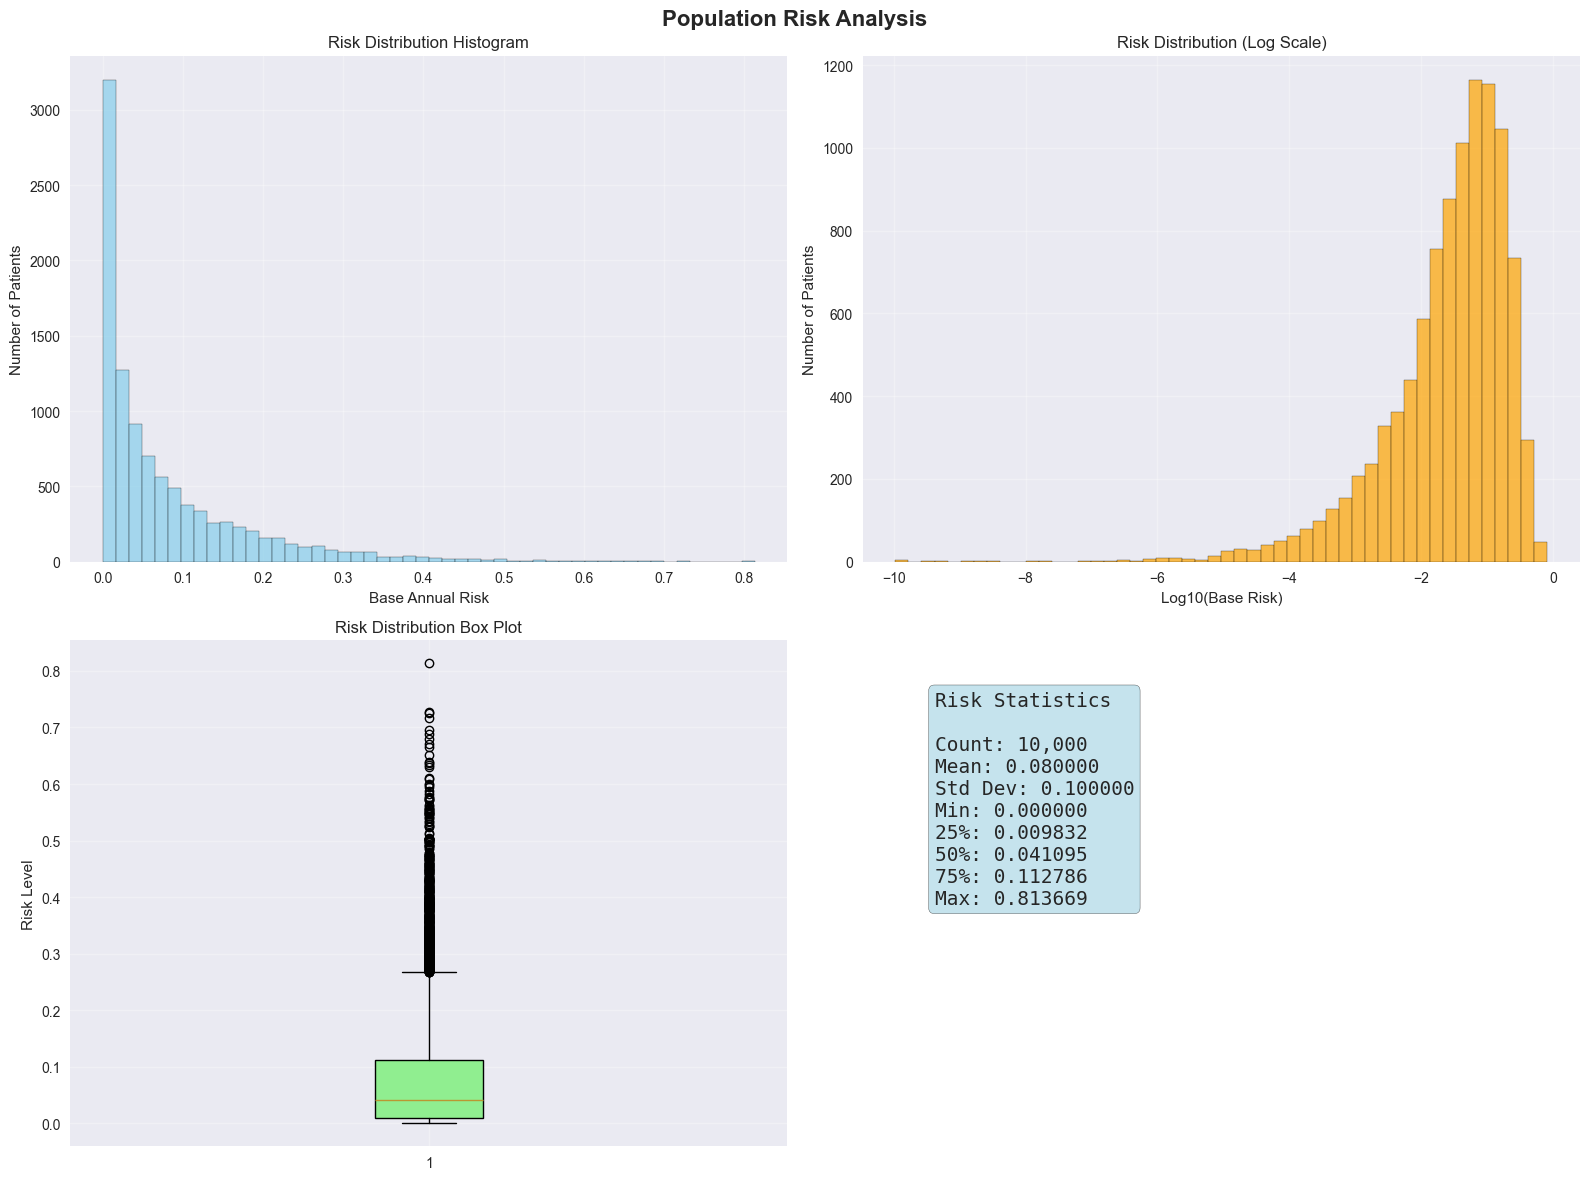

📊 Population Risk Statistics:
   Count: 10,000
   Mean: 0.080000
   Std Dev: 0.100000
   Min: 0.000000
   Max: 0.813669
   Median: 0.041095


In [5]:
# Population risk distribution analysis
if 'patient_risks' in data:
    risks = data['patient_risks']['base_risk']
    
    # Create matplotlib plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Population Risk Analysis', fontsize=16, fontweight='bold')
    
    # Risk distribution histogram
    axes[0, 0].hist(risks, bins=50, alpha=0.7, edgecolor='black', color='skyblue')
    axes[0, 0].set_xlabel('Base Annual Risk')
    axes[0, 0].set_ylabel('Number of Patients')
    axes[0, 0].set_title('Risk Distribution Histogram')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Log scale histogram
    axes[0, 1].hist(np.log10(risks + 1e-10), bins=50, alpha=0.7, edgecolor='black', color='orange')
    axes[0, 1].set_xlabel('Log10(Base Risk)')
    axes[0, 1].set_ylabel('Number of Patients')
    axes[0, 1].set_title('Risk Distribution (Log Scale)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Box plot
    box_plot = axes[1, 0].boxplot(risks, patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightgreen')
    axes[1, 0].set_ylabel('Risk Level')
    axes[1, 0].set_title('Risk Distribution Box Plot')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Statistics table
    axes[1, 1].axis('off')
    
    # Create statistics text (avoid f-string with triple quotes)
    count_val = len(risks)
    mean_val = risks.mean()
    std_val = risks.std()
    min_val = risks.min()
    q25_val = risks.quantile(0.25)
    median_val = risks.median()
    q75_val = risks.quantile(0.75)
    max_val = risks.max()
    
    risk_stats_text = f"""Risk Statistics
    
Count: {count_val:,}
Mean: {mean_val:.6f}
Std Dev: {std_val:.6f}
Min: {min_val:.6f}
25%: {q25_val:.6f}
50%: {median_val:.6f}
75%: {q75_val:.6f}
Max: {max_val:.6f}"""
    
    axes[1, 1].text(0.1, 0.9, risk_stats_text, transform=axes[1, 1].transAxes,
                    fontsize=14, verticalalignment='top', fontfamily='monospace',
                    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("📊 Population Risk Statistics:")
    print(f"   Count: {len(risks):,}")
    print(f"   Mean: {risks.mean():.6f}")
    print(f"   Std Dev: {risks.std():.6f}")
    print(f"   Min: {risks.min():.6f}")
    print(f"   Max: {risks.max():.6f}")
    print(f"   Median: {risks.median():.6f}")
else:
    print("❌ Patient risk data not available")

## ⏰ Temporal Dynamics

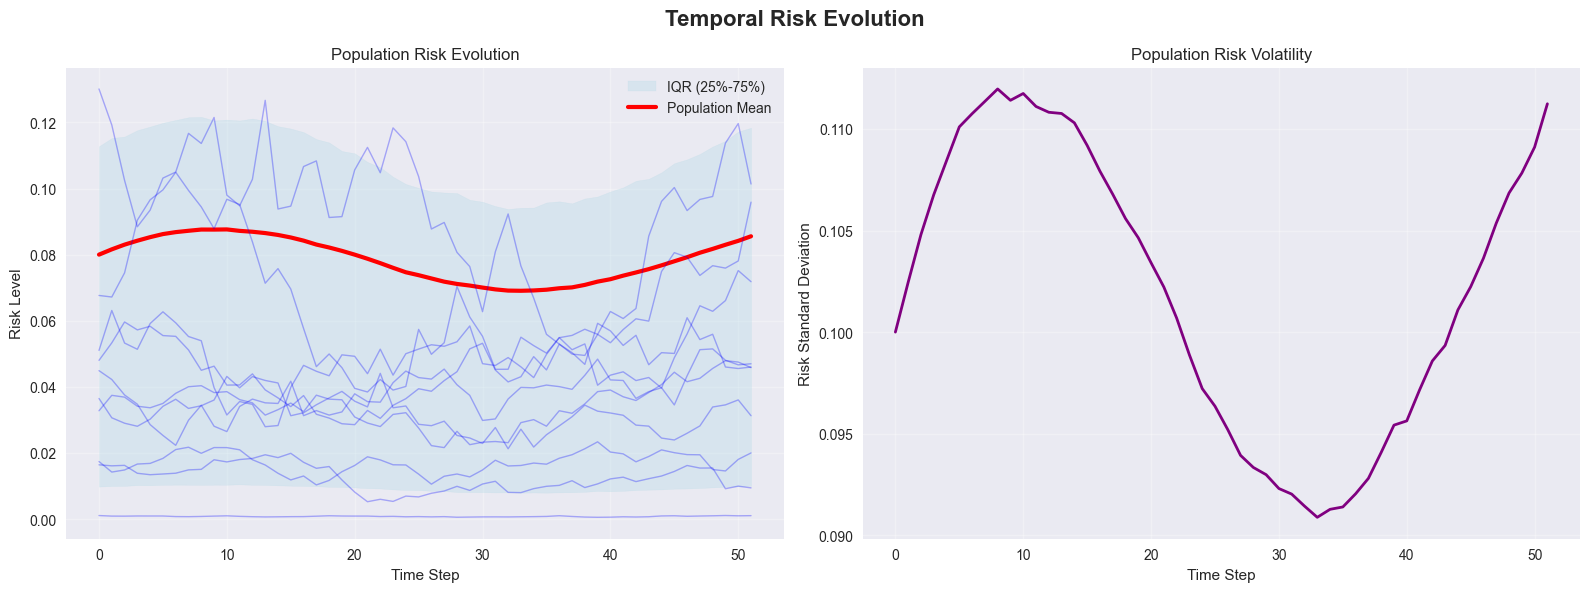

📊 Temporal Dynamics Summary:
   Average risk range per patient: 0.0622
   Population risk volatility: 0.0065
   Starting population risk: 0.0800
   Ending population risk: 0.0856


In [6]:
# Temporal risk evolution analysis
if 'temporal_matrix' in data:
    temporal_data = data['temporal_matrix']
    
    # Calculate population-level statistics over time
    mean_risk_over_time = temporal_data.mean(axis=0)
    std_risk_over_time = temporal_data.std(axis=0)
    q25_over_time = temporal_data.quantile(0.25, axis=0)
    q75_over_time = temporal_data.quantile(0.75, axis=0)
    
    # Create temporal evolution plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Temporal Risk Evolution', fontsize=16, fontweight='bold')
    
    time_steps = range(len(mean_risk_over_time))
    
    # Population mean with confidence band
    ax1.fill_between(time_steps, q25_over_time, q75_over_time, alpha=0.3, color='lightblue', label='IQR (25%-75%)')
    ax1.plot(time_steps, mean_risk_over_time, color='red', linewidth=3, label='Population Mean')
    
    # Sample patient trajectories
    n_sample_patients = min(20, len(temporal_data))
    sample_indices = np.random.choice(len(temporal_data), n_sample_patients, replace=False)
    
    for i, idx in enumerate(sample_indices[:10]):  # Show only 10 for clarity
        patient_risks = temporal_data.iloc[idx]
        ax1.plot(time_steps, patient_risks, alpha=0.3, color='blue', linewidth=1)
    
    ax1.set_xlabel('Time Step')
    ax1.set_ylabel('Risk Level')
    ax1.set_title('Population Risk Evolution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Risk volatility over time
    ax2.plot(time_steps, std_risk_over_time, color='purple', linewidth=2)
    ax2.set_xlabel('Time Step')
    ax2.set_ylabel('Risk Standard Deviation')
    ax2.set_title('Population Risk Volatility')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate temporal statistics
    print("📊 Temporal Dynamics Summary:")
    print(f"   Average risk range per patient: {(temporal_data.max(axis=1) - temporal_data.min(axis=1)).mean():.4f}")
    print(f"   Population risk volatility: {mean_risk_over_time.std():.4f}")
    print(f"   Starting population risk: {mean_risk_over_time.iloc[0]:.4f}")
    print(f"   Ending population risk: {mean_risk_over_time.iloc[-1]:.4f}")
else:
    print("❌ Temporal risk data not available")

## 🎯 Intervention Effectiveness {#interventions}

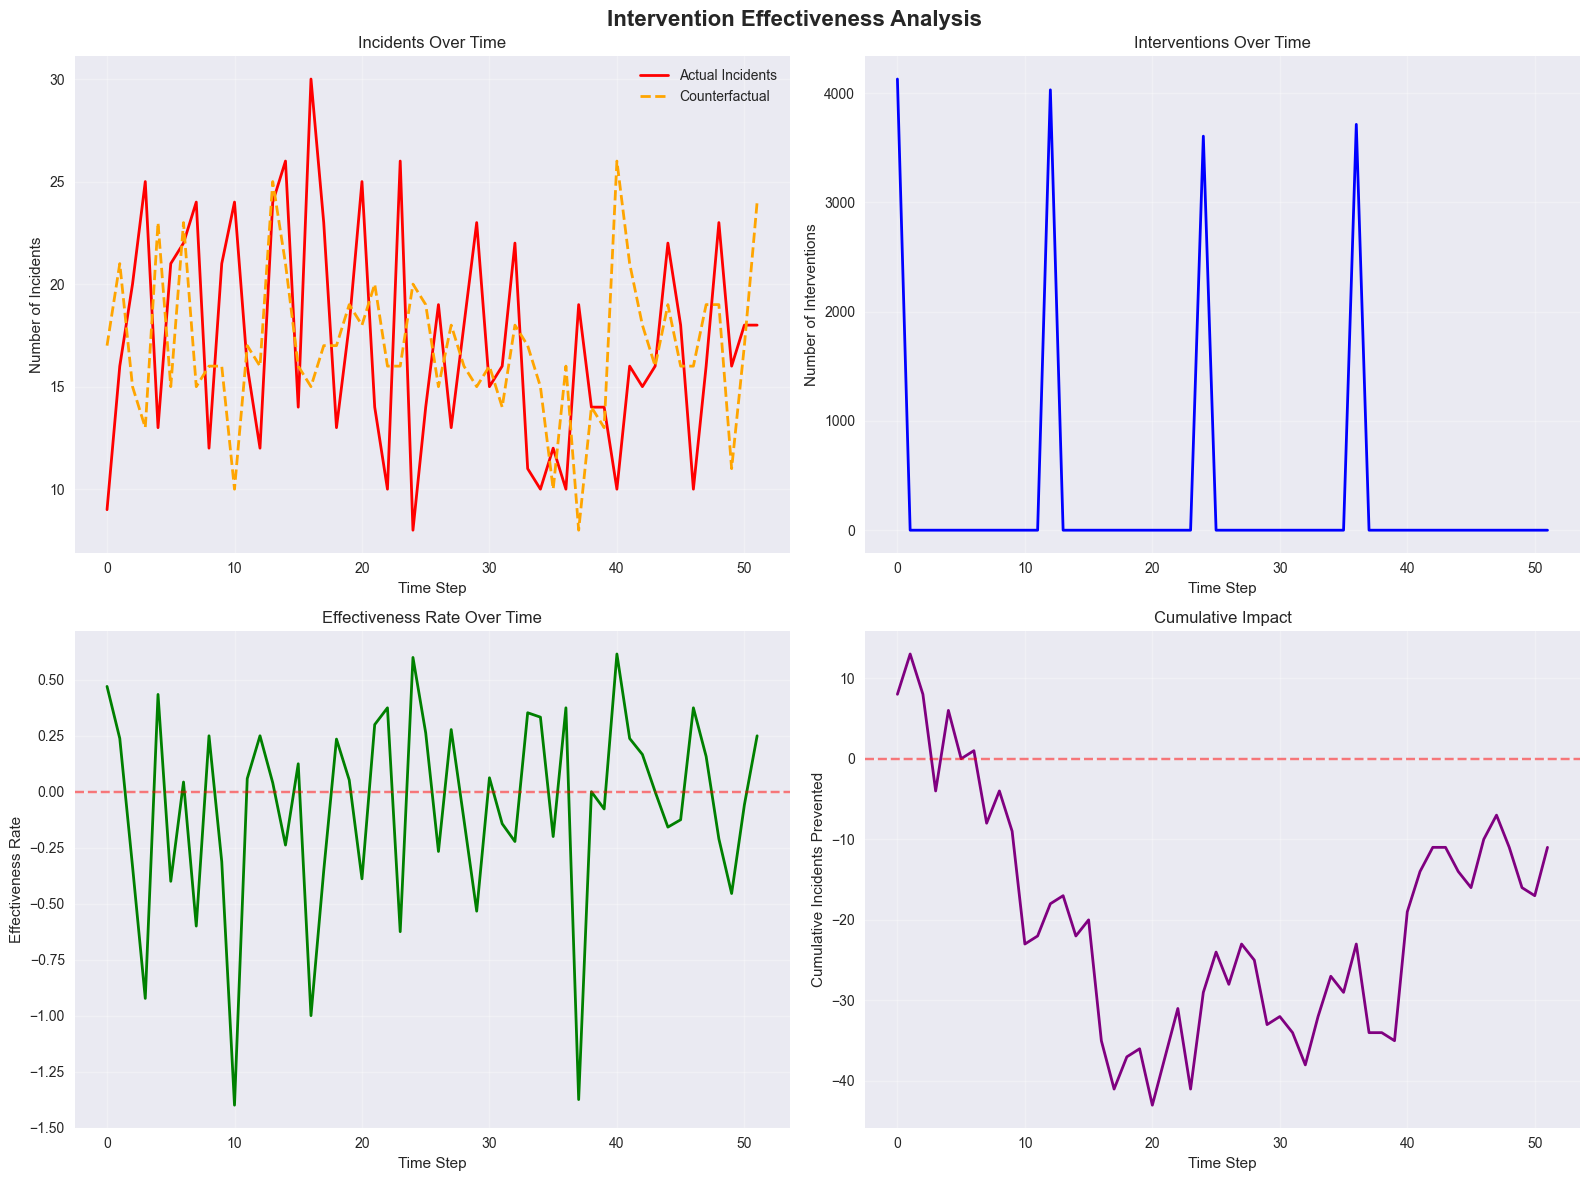

🎯 Intervention Effectiveness Summary:
   Total interventions: 15,483
   Total actual incidents: 894
   Total counterfactual incidents: 883
   Incidents prevented: -11
   Overall effectiveness: -1.2%
   Number needed to treat: 15483.0


In [7]:
# Intervention effectiveness analysis
if 'incidents' in data and 'counterfactuals' in data and 'interventions' in data:
    incidents = data['incidents']
    counterfactuals = data['counterfactuals']
    interventions = data['interventions']
    
    # Calculate effectiveness over time
    actual_by_time = incidents.sum(axis=0)
    counterfactual_by_time = counterfactuals.sum(axis=0)
    interventions_by_time = interventions.sum(axis=0)
    
    # Calculate effectiveness rate
    effectiveness_by_time = np.where(
        counterfactual_by_time > 0,
        (counterfactual_by_time - actual_by_time) / counterfactual_by_time,
        0
    )
    
    # Create effectiveness dashboard
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Intervention Effectiveness Analysis', fontsize=16, fontweight='bold')
    
    time_steps = range(len(actual_by_time))
    
    # Incidents comparison
    axes[0, 0].plot(time_steps, actual_by_time, label='Actual Incidents', linewidth=2, color='red')
    axes[0, 0].plot(time_steps, counterfactual_by_time, label='Counterfactual', linewidth=2, linestyle='--', color='orange')
    axes[0, 0].set_xlabel('Time Step')
    axes[0, 0].set_ylabel('Number of Incidents')
    axes[0, 0].set_title('Incidents Over Time')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Interventions over time
    axes[0, 1].plot(time_steps, interventions_by_time, color='blue', linewidth=2)
    axes[0, 1].set_xlabel('Time Step')
    axes[0, 1].set_ylabel('Number of Interventions')
    axes[0, 1].set_title('Interventions Over Time')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Effectiveness rate
    axes[1, 0].plot(time_steps, effectiveness_by_time, color='green', linewidth=2)
    axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    axes[1, 0].set_xlabel('Time Step')
    axes[1, 0].set_ylabel('Effectiveness Rate')
    axes[1, 0].set_title('Effectiveness Rate Over Time')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Cumulative impact
    cumulative_prevented = np.cumsum(counterfactual_by_time - actual_by_time)
    axes[1, 1].plot(time_steps, cumulative_prevented, color='purple', linewidth=2)
    axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    axes[1, 1].set_xlabel('Time Step')
    axes[1, 1].set_ylabel('Cumulative Incidents Prevented')
    axes[1, 1].set_title('Cumulative Impact')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    total_actual = actual_by_time.sum()
    total_counterfactual = counterfactual_by_time.sum()
    total_interventions = interventions_by_time.sum()
    
    print("🎯 Intervention Effectiveness Summary:")
    print(f"   Total interventions: {total_interventions:,}")
    print(f"   Total actual incidents: {total_actual:,}")
    print(f"   Total counterfactual incidents: {total_counterfactual:,}")
    print(f"   Incidents prevented: {total_counterfactual - total_actual:,}")
    
    if total_counterfactual > 0:
        overall_effectiveness = (total_counterfactual - total_actual) / total_counterfactual
        print(f"   Overall effectiveness: {overall_effectiveness:.1%}")
    
    if total_interventions > 0:
        nnt = total_interventions / max(1, total_counterfactual - total_actual)
        print(f"   Number needed to treat: {nnt:.1f}")
else:
    print("❌ Intervention effectiveness data not available")

## 🤖 ML Model Performance

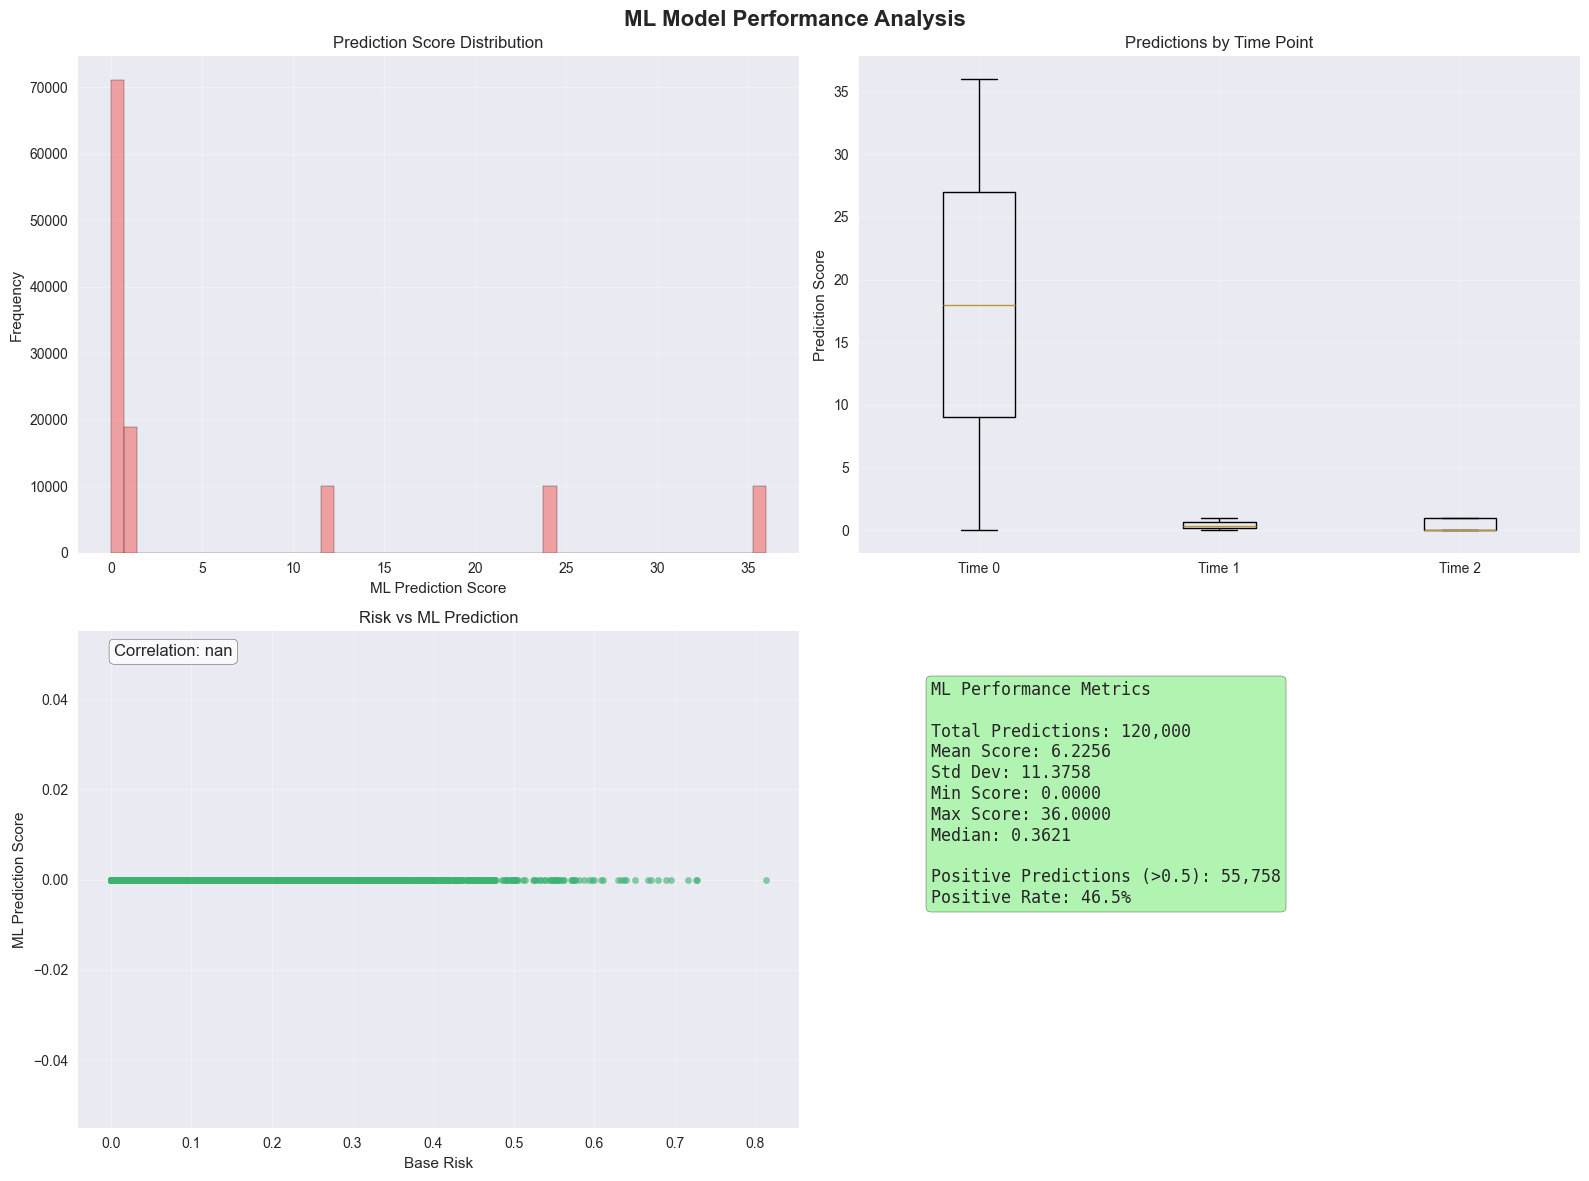

🤖 ML Model Performance Summary:
   Total predictions: 120,000
   Mean prediction score: 6.2256
   Prediction range: 0.0000 - 36.0000
   Positive predictions (>0.5): 55,758 (46.5%)


In [8]:
# ML model performance analysis
if 'ml_predictions' in data:
    ml_data = data['ml_predictions']
    
    # Get prediction columns (skip first column if it's an index)
    prediction_cols = [col for col in ml_data.columns if col != ml_data.columns[0]]
    
    if prediction_cols:
        # Combine all predictions
        all_predictions = []
        for col in prediction_cols:
            valid_preds = ml_data[col].dropna()
            all_predictions.extend(valid_preds)
        
        all_predictions = np.array(all_predictions)
        
        # Create ML performance plots
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('ML Model Performance Analysis', fontsize=16, fontweight='bold')
        
        # Prediction distribution
        axes[0, 0].hist(all_predictions, bins=50, alpha=0.7, edgecolor='black', color='lightcoral')
        axes[0, 0].set_xlabel('ML Prediction Score')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].set_title('Prediction Score Distribution')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Predictions by time (box plots)
        if len(prediction_cols) > 1:
            pred_data_by_time = []
            labels = []
            for i, col in enumerate(prediction_cols[:4]):  # Show up to 4 time points
                valid_preds = ml_data[col].dropna()
                if len(valid_preds) > 0:
                    pred_data_by_time.append(valid_preds)
                    labels.append(f"Time {i}")
            
            if pred_data_by_time:
                axes[0, 1].boxplot(pred_data_by_time, labels=labels)
                axes[0, 1].set_ylabel('Prediction Score')
                axes[0, 1].set_title('Predictions by Time Point')
                axes[0, 1].grid(True, alpha=0.3)
        
        # Risk vs prediction correlation (if available)
        if 'patient_risks' in data:
            risks = data['patient_risks']['base_risk']
            first_predictions = ml_data[prediction_cols[0]].dropna()
            
            # Match lengths
            min_len = min(len(risks), len(first_predictions))
            if min_len > 0:
                matching_risks = risks.iloc[:min_len]
                matching_predictions = first_predictions.iloc[:min_len]
                
                axes[1, 0].scatter(matching_risks, matching_predictions, alpha=0.6, s=20, color='mediumseagreen')
                axes[1, 0].set_xlabel('Base Risk')
                axes[1, 0].set_ylabel('ML Prediction Score')
                axes[1, 0].set_title('Risk vs ML Prediction')
                axes[1, 0].grid(True, alpha=0.3)
                
                # Calculate correlation
                correlation = np.corrcoef(matching_risks, matching_predictions)[0, 1]
                axes[1, 0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                              transform=axes[1, 0].transAxes, fontsize=12,
                              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Performance metrics text
        axes[1, 1].axis('off')
        
        # Create performance text (avoid f-string with triple quotes)
        total_preds = len(all_predictions)
        mean_score = np.mean(all_predictions)
        std_score = np.std(all_predictions)
        min_score = np.min(all_predictions)
        max_score = np.max(all_predictions)
        median_score = np.median(all_predictions)
        pos_preds = np.sum(all_predictions > 0.5)
        pos_rate = np.mean(all_predictions > 0.5)
        
        perf_text = f"""ML Performance Metrics
        
Total Predictions: {total_preds:,}
Mean Score: {mean_score:.4f}
Std Dev: {std_score:.4f}
Min Score: {min_score:.4f}
Max Score: {max_score:.4f}
Median: {median_score:.4f}

Positive Predictions (>0.5): {pos_preds:,}
Positive Rate: {pos_rate:.1%}"""
        
        axes[1, 1].text(0.1, 0.9, perf_text, transform=axes[1, 1].transAxes,
                        fontsize=12, verticalalignment='top', fontfamily='monospace',
                        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
        
        plt.tight_layout()
        plt.show()
        
        # Print ML summary
        print("🤖 ML Model Performance Summary:")
        print(f"   Total predictions: {len(all_predictions):,}")
        print(f"   Mean prediction score: {np.mean(all_predictions):.4f}")
        print(f"   Prediction range: {np.min(all_predictions):.4f} - {np.max(all_predictions):.4f}")
        print(f"   Positive predictions (>0.5): {np.sum(all_predictions > 0.5):,} ({np.mean(all_predictions > 0.5):.1%})")
    else:
        print("⚠️ No prediction columns found in ML data")
else:
    print("❌ ML prediction data not available")

## 💡 Recommendations {#recommendations}

In [9]:
# Generate actionable recommendations
print("💡 ACTIONABLE RECOMMENDATIONS")
print("="*50)

recommendations = []

if stats:
    # Check intervention coverage
    int_stats = stats.get('intervention_statistics', {})
    coverage = int_stats.get('intervention_coverage', 0)
    
    if coverage < 0.05:
        recommendations.append(
            f"📈 INCREASE INTERVENTION COVERAGE: Current coverage is {coverage:.1%}, "
            f"which is below the recommended 5-50% range. Try lowering the ML threshold to 0.3."
        )
    elif coverage > 0.5:
        recommendations.append(
            f"📉 REDUCE INTERVENTION COVERAGE: Current coverage is {coverage:.1%}, "
            f"which may be too high. Consider raising the ML threshold."
        )
    else:
        recommendations.append(
            f"✅ INTERVENTION COVERAGE OPTIMAL: Current coverage of {coverage:.1%} is within range."
        )
    
    # Check incident reduction
    cf_stats = stats.get('counterfactual_statistics', {})
    incident_reduction = cf_stats.get('incident_reduction', 0)
    
    if incident_reduction <= 0:
        recommendations.append(
            "⚠️ NEGATIVE EFFECTIVENESS: Interventions appear to increase incidents. "
            "Try increasing intervention effectiveness parameter to 0.4 or 0.5."
        )
    elif incident_reduction < 0.1:
        recommendations.append(
            f"📊 LOW EFFECTIVENESS: Current reduction is {incident_reduction:.1%}. "
            f"Consider increasing intervention effectiveness or improving targeting."
        )
    else:
        recommendations.append(
            f"✅ GOOD EFFECTIVENESS: Achieving {incident_reduction:.1%} incident reduction."
        )
    
    # Check validation failures
    validation = stats.get('validation_results', {})
    failed_checks = [check for check, passed in validation.items() if not passed]
    
    if failed_checks:
        recommendations.append(
            f"✅ VALIDATION FAILURES: {', '.join(failed_checks)}. "
            f"Review simulation parameters to meet validation criteria."
        )

# Print recommendations
if recommendations:
    for i, rec in enumerate(recommendations, 1):
        print(f"\n{i}. {rec}")
else:
    print("\n✅ Results look good! No major issues identified.")

print(f"\n📁 All analysis results available in: {RESULTS_DIR}")
print("\n🎉 Analysis complete!")

💡 ACTIONABLE RECOMMENDATIONS

1. 📈 INCREASE INTERVENTION COVERAGE: Current coverage is 3.0%, which is below the recommended 5-50% range. Try lowering the ML threshold to 0.3.

2. ⚠️ NEGATIVE EFFECTIVENESS: Interventions appear to increase incidents. Try increasing intervention effectiveness parameter to 0.4 or 0.5.

3. ✅ VALIDATION FAILURES: intervention_coverage. Review simulation parameters to meet validation criteria.

📁 All analysis results available in: ../outputs/baseline_simulation/

🎉 Analysis complete!


## 🚀 Next Steps

Based on this analysis, try these parameter adjustments:

```bash
# Lower threshold for more interventions
python experiments/run_baseline_simulation.py intervention.threshold=0.3

# Increase intervention effectiveness
python experiments/run_baseline_simulation.py intervention.effectiveness=0.4

# Try top-k strategy
python experiments/run_baseline_simulation.py \
    intervention.assignment_strategy=top_k \
    intervention.treatment_fraction=0.1

# Analyze new results
python quick_results_view.py outputs/baseline_simulation/
```